In [2]:
import pandas as pd
import numpy as np
import pyreadr
import math

In [3]:
data_read = pyreadr.read_r("../data/wage2015_subsample_inference.Rdata")
data = data_read[ 'data' ]
data.shape

(5150, 20)

In [4]:
data

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
rownames,,,,,,,,,,,,,,,,,,,,
10,9.615385,2.263364,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,0.49,0.343,0.2401,3600,11,8370,18
12,48.076923,3.872802,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,31.0,9.61,29.791,92.3521,3050,10,5070,9
15,11.057692,2.403126,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,3.24,5.832,10.4976,6260,19,770,4
18,13.942308,2.634928,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,25.0,6.25,15.625,39.0625,420,1,6990,12
19,28.846154,3.361977,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,22.0,4.84,10.648,23.4256,2015,6,9470,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32620,14.769231,2.692546,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,0.81,0.729,0.6561,4700,16,4970,9
32624,23.076923,3.138833,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,1.44,1.728,2.0736,4110,13,8680,20
32626,38.461538,3.649659,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,11.0,1.21,1.331,1.4641,1550,4,3680,6


In [31]:

m = data[ ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1",'exp2',"exp3","exp4",'occ', 'occ2','ind','ind2'] ]

college=m[m['clg']==1]
m_college= college[ ["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1",'exp2',"exp3","exp4",'occ', 'occ2','ind','ind2'] ]
scl=m[m['scl']==1]
m_scl=scl[["lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1",'exp2',"exp3","exp4",'occ', 'occ2','ind','ind2']]

In [32]:
m_college.shape

(1636, 19)

In [33]:
m_scl.shape

(1432, 19)

In [34]:
total=pd.concat([m_college,m_scl])
total.shape

(3068, 19)

In [9]:
total.reset_index(inplace=True)

In [35]:
total2 = total[ ["lwage","sex","scl","clg","ne","mw","so","we","exp1",'exp2',"exp3","exp4",'occ', 'occ2','ind','ind2']]

total3 = total2[ ["lwage","sex","scl","clg","ne","mw","so","we","exp1"]]

data_female = total3[total3[ 'sex' ] == 1 ]
t_female = data_female[ ["lwage","sex","scl","clg","ne","mw","so","we","exp1"] ]

data_male = total3[ total3[ 'sex' ] == 0 ]
t_male = data_male[ [ "lwage","sex","scl","clg","ne","mw","so","we","exp1" ] ]


table = np.zeros( (9, 3) )
table[:, 0] = total3.mean().values
table[:, 1] = t_male.mean().values
table[:, 2] = t_female.mean().values
table_pandas = pd.DataFrame( table, columns = [ 'All', 'Men', 'Women'])
table_pandas.index = ["Log Wage","Sex","Some College","Gollage Graduate","Northeast","Midwest","South","West","Experience"]
table_html = table_pandas.to_html()

table_pandas

,All,Men,Women
Log Wage,3.000022,3.038412,2.956904
Sex,0.470991,0.000000,1.000000
Some College,0.466754,0.481824,0.449827
Gollage Graduate,0.533246,0.518176,0.550173
Northeast,0.226532,0.219347,0.234602
Midwest,0.265971,0.261245,0.271280
South,0.285854,0.290819,0.280277
West,0.221643,0.228589,0.213841
Experience,12.700945,12.433148,13.001730


In [36]:
data_female['lwage'].mean() - data_male['lwage'].mean()

-0.08150855508735866

In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [38]:
nocontrol_model = smf.ols( formula = 'lwage ~ sex', data = total2 )
nocontrol_est = nocontrol_model.fit().summary2().tables[1]['Coef.']['sex']
HCV_coefs = nocontrol_model.fit().cov_HC0
nocontrol_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

In [39]:
print( f'The estimated gender coefficient is {nocontrol_est} and the corresponding robust standard error is {nocontrol_se}' )

The estimated gender coefficient is -0.08150855508736156 and the corresponding robust standard error is 0.019579647767772403


# OLS

In [40]:
#["lwage","sex","scl","clg","ne","mw","so","we","exp1"]
flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4)*(clg+mw+so+we+occ2+ind2)'
control_model = smf.ols( formula = flex, data = total2 )
control_est = control_model.fit().summary2().tables[1]['Coef.']['sex']

print(control_model.fit().summary2().tables[1])
print(f"Coefficient for OLS with controls {control_est}" )

HCV_coefs = control_model.fit().cov_HC0
control_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

               Coef.  Std.Err.         t         P>|t|    [0.025    0.975]
Intercept   2.985101  0.336482  8.871492  1.250129e-18  2.325327  3.644876
occ2[T.10]  0.091982  0.243220  0.378184  7.053225e-01 -0.384925  0.568888
occ2[T.11] -0.499418  0.436858 -1.143202  2.530511e-01 -1.356010  0.357175
occ2[T.12]  0.190101  0.341142  0.557249  5.774012e-01 -0.478810  0.859012
occ2[T.13] -0.194529  0.271881 -0.715492  4.743637e-01 -0.727633  0.338575
...              ...       ...       ...           ...       ...       ...
exp3:we    -0.230864  0.184398 -1.251987  2.106777e-01 -0.592431  0.130704
exp4:clg   -0.013467  0.020134 -0.668849  5.036463e-01 -0.052945  0.026012
exp4:mw     0.014287  0.025814  0.553477  5.799802e-01 -0.036328  0.064902
exp4:so    -0.003759  0.022547 -0.166725  8.675981e-01 -0.047968  0.040450
exp4:we     0.028286  0.023812  1.187890  2.349761e-01 -0.018405  0.074978

[231 rows x 6 columns]
Coefficient for OLS with controls -0.053062340357757656


In [44]:
control_model.fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.275    
Dependent Variable: lwage            AIC:                4209.2431
Date:               2021-09-10 14:21 BIC:                5595.8628
No. Observations:   3068             Log-Likelihood:     -1874.6  
Df Model:           229              F-statistic:        6.091    
Df Residuals:       2838             Prob (F-statistic): 2.03e-127
R-squared:          0.330            Scale:              0.21483  
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept           2.9851   0.3365  8.8715 0.0000  2.3253  3.6449
occ2[T.10]          0.0920   0.2432  0.3782 0.7053 -0.3849  0.5689
occ2[T.11]         -0.4994   0.4369 -1.1432 0.2531 -1.3560  0.3572
occ2[T.12]          0.1901   0.3411  0.5572 0.5774 -0.4788  0.8590
occ2[T.13]         -0.1945   0.2719 -0.7155 0.4744 -0.7276  0.3386
occ2[T.14]          0.3010   0.3808  0.7904 0.4294 -0.4457  1.0478
occ2[T.15]         -0.3370   0.3357 -1.0040 0.3155 -0.9952  0.3212
occ2[T.16]         -0.0407   0.1712 -0.2379 0.8120 -0.3765  0.2950
occ2[T.17]         -0.4552   0.1586 -2.8702 0.0041 -0.7662 -0.1442
occ2[T.18]         -0.0305   1.9458 -0.0157 0.9875 -3.8458  3.7847
occ2[T.19]          0.0020   0.4192  0.0049 0.9961 -0.8199  0.8240
occ2[T.2]           0.2152   0.1582  1.3601 0.1739 -0.0950  0.5254
occ2[T.20]         -0.4223   0.2607 -1.6198 0.1054 -0.9336  0.0889
occ2[T.21]         -0.9013   0.2870 -3.1407 0.0017 -1.4640 -0.3386
occ2[T.22]         -0.0169   0.4865 -0.0347 0.9723 -0.9707  0.9370
occ2[T.3]           0.0488   0.2095  0.2327 0.8160 -0.3621  0.4596
occ2[T.4]           0.0281   0.2300  0.1224 0.9026 -0.4229  0.4791
occ2[T.5]          -0.2712   0.3944 -0.6875 0.4918 -1.0446  0.5022
occ2[T.6]          -0.2001   0.2706 -0.7394 0.4597 -0.7306  0.3305
occ2[T.7]          -0.1203   0.4188 -0.2873 0.7739 -0.9415  0.7008
occ2[T.8]          -0.1719   0.2721 -0.6318 0.5276 -0.7056  0.3617
occ2[T.9]          -0.3964   0.2050 -1.9331 0.0533 -0.7984  0.0057
ind2[T.11]         -0.2128   0.3507 -0.6069 0.5440 -0.9004  0.4748
ind2[T.12]         -0.1631   0.3174 -0.5141 0.6073 -0.7854  0.4592
ind2[T.13]         -0.4458   0.4286 -1.0400 0.2984 -1.2863  0.3947
ind2[T.14]          0.0605   0.3132  0.1932 0.8468 -0.5535  0.6746
ind2[T.15]         -0.0146   0.5717 -0.0256 0.9796 -1.1356  1.1064
ind2[T.16]         -0.0574   0.3515 -0.1632 0.8704 -0.7466  0.6319
ind2[T.17]         -0.4180   0.3559 -1.1745 0.2403 -1.1158  0.2798
ind2[T.18]         -0.1890   0.3353 -0.5638 0.5730 -0.8465  0.4684
ind2[T.19]         -0.2909   0.3913 -0.7433 0.4574 -1.0582  0.4764
ind2[T.2]           0.4507   0.5676  0.7940 0.4272 -0.6622  1.5635
ind2[T.20]         -0.3636   0.3528 -1.0306 0.3028 -1.0554  0.3282
ind2[T.21]         -0.0491   0.3643 -0.1348 0.8928 -0.7635  0.6652
ind2[T.22]          0.0720   0.3730  0.1931 0.8469 -0.6594  0.8034
ind2[T.3]          -0.4868   0.6578 -0.7401 0.4593 -1.7767  0.8030
ind2[T.4]           0.4980   0.4163  1.1961 0.2318 -0.3184  1.3143
ind2[T.5]           0.0736   0.3575  0.2058 0.8369 -0.6273  0.7745
ind2[T.6]          -0.1036   0.3535 -0.2931 0.7695 -0.7967  0.5895
ind2[T.7]           0.1694   0.4186  0.4047 0.6857 -0.6513  0.9901
ind2[T.8]          -0.1998   0.4368 -0.4574 0.6474 -1.0562  0.6567
ind2[T.9]          -0.3539   0.3248 -1.0895 0.2760 -0.9908  0.2830
sex                -0.0531   0.0194 -2.7418 0.0061 -0.0910 -0.0151
exp1               -0.0155   0.1206 -0.1288 0.8975 -0.2520  0.2209
exp1:occ2[T.10]     0.0023   0.0933  0.0244 0.9805 -0.1807  0.1853
exp1:occ2[T.11]     0.0370   0.1572  0.2353 0.8140 -0.2712  0.3452
exp1:occ2[T.12]    -0.1062   0.1223 -0.8690 0.3849 -0.3460  0.1335
exp1:occ2[T.13] 

In [45]:
control_se

0.19319010784693572

## Partialling-Out using ols

In [46]:
# models
# model for Y
flex_y = 'lwage ~  (exp1+exp2+exp3+exp4)*(clg+mw+so+we+occ2+ind2)'
# model for D
flex_d = 'sex ~ (exp1+exp2+exp3+exp4)*(clg+mw+so+we+occ2+ind2)' 

# partialling-out the linear effect of W from Y
t_Y = smf.ols( formula = flex_y , data = total2 ).fit().resid

# partialling-out the linear effect of W from D
t_D = smf.ols( formula = flex_d , data = total2 ).fit().resid

data_res = pd.DataFrame( np.vstack(( t_Y.values , t_D.values )).T , columns = [ 't_Y', 't_D' ] )
# regression of Y on D after partialling-out the effect of W
partial_fit =  smf.ols( formula = 't_Y ~ t_D' , data = data_res ).fit()
partial_est = partial_fit.summary2().tables[1]['Coef.']['t_D']

print("Coefficient for D via partialling-out", partial_est)

# standard error
HCV_coefs = partial_fit.cov_HC0
partial_se = np.power( HCV_coefs.diagonal() , 0.5)[1]

# confidence interval
partial_fit.conf_int( alpha=0.05 ).iloc[1, :]

Coefficient for D via partialling-out -0.053062340357753764


0   -0.089571
1   -0.016554
Name: t_D, dtype: float64

In [72]:
yhat=list(smf.ols( formula = flex_y , data = total2 ).fit().predict())

In [ ]:
total2['ypredicho']=yhat

In [87]:
total2

,rownames,lwage,sex,scl,clg,ne,mw,so,we,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2,ypredicho
0,10,2.263364,1.0,0.0,1.0,1.0,0.0,0.0,0.0,7.0,0.4900,0.343000,0.240100,3600,11,8370,18,2.762284
1,12,3.872802,0.0,0.0,1.0,1.0,0.0,0.0,0.0,31.0,9.6100,29.791000,92.352100,3050,10,5070,9,3.575963
2,19,3.361977,1.0,0.0,1.0,1.0,0.0,0.0,0.0,22.0,4.8400,10.648000,23.425600,2015,6,9470,22,3.222386
3,30,2.462215,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0100,0.001000,0.000100,1650,5,7460,14,2.938010
4,71,2.956512,1.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.1600,0.064000,0.025600,3255,10,8190,18,3.143722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,32528,2.486508,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.1600,0.064000,0.025600,9620,22,6170,10,2.578097
3064,32539,3.649659,1.0,1.0,0.0,0.0,0.0,0.0,1.0,7.5,0.5625,0.421875,0.316406,220,1,770,4,2.995180
3065,32551,3.328075,0.0,1.0,0.0,0.0,0.0,0.0,1.0,28.5,8.1225,23.149125,65.975006,8140,21,770,4,3.033369
3066,32579,2.486508,0.0,1.0,0.0,0.0,0.0,0.0,1.0,31.5,9.9225,31.255875,98.456006,5510,17,6380,10,2.901543


In [47]:
import matplotlib.pyplot as plt

In [95]:
total5=total2[total2['clg']==1]

In [97]:
total6=total2[total2['scl']==1]

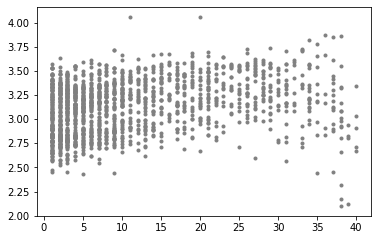

In [101]:
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(total5['exp1'], total5['ypredicho'], marker='.', color = "gray")
ax.plot(total6['exp1'], total6["ypredicho"], linestyle='-', label="OLS")
ax.legend();

In [33]:
control_model.fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.103    
Dependent Variable: lwage            AIC:                4654.4751
Date:               2021-09-10 11:12 BIC:                4720.7917
No. Observations:   3068             Log-Likelihood:     -2316.2  
Df Model:           10               F-statistic:        36.19    
Df Residuals:       3057             Prob (F-statistic): 1.58e-67 
R-squared:          0.106            Scale:              0.26598  
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      1.6675    0.0100  166.7814  0.0000   1.6479   1.6871
sex           -0.0966    0.0187   -5.1665  0.0000  -0.1333  -0.0599
exp1           0.0052    0.0005    9.7583  0.0000   0.0041   0.0062
scl            0.6523    0.0170   38.3986  0.0000   0.6190   0.6856
clg            1.0152    0.0151   67.1447  0.0000   0.9856   1.0449
ne             0.3865    0.0266   14.5393  0.0000   0.3344   0.4387
mw             0.4229    0.0256   16.5221  0.0000   0.3727   0.4731
so             0.4193    0.0241   17.3797  0.0000   0.3720   0.4666
we             0.4388    0.0275   15.9489  0.0000   0.3848   0.4927
exp1:scl       0.0042    0.0010    4.2964  0.0000   0.0023   0.0061
exp1:clg       0.0010    0.0009    1.0336  0.3014  -0.0009   0.0028
exp1:ne        0.0036    0.0016    2.2618  0.0238   0.0005   0.0067
exp1:mw       -0.0006    0.0016   -0.3592  0.7195  -0.0037   0.0025
exp1:so        0.0008    0.0015    0.5642  0.5727  -0.0021   0.0038
exp1:we        0.0013    0.0016    0.7891  0.4301  -0.0019   0.0045
------------------------------------------------------------------
Omnibus:           182.286   Durbin-Watson:      1.849            
Prob(Omnibus):     0.000     Jarque-Bera (JB):   484.248          
Skew:              0.321     Prob(JB):           0.000            
Kurtosis:          4.838     Condition No.:      79600477401352320
==================================================================
* The condition number is large (8e+16). This might indicate
strong multicollinearity or other numerical problems.
"""